In [ ]:
!pip install geopandas
!pip install folium
!pip install ipyleaflet

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io
import folium
from ipyleaflet import Map, TileLayer, ScaleControl
import os

In [24]:
# Function to load Natural Earth data
def load_natural_earth_data():
    try:
        # Try to load using GeoPandas internal dataset method (for versions < 1.0)
        world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
        return world
    except AttributeError:
        # GeoPandas > 1.0 detected
        print("GeoPandas > 1.0 detected, downloading dataset...")

        # Correct download URL for the Natural Earth dataset
        url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

        # Send HTTP request to download the file
        response = requests.get(url)

        # Unzip the downloaded content
        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            z.extractall("natural_earth_data")

        # Load the shapefile from the extracted content
        shapefile_path = "natural_earth_data/ne_110m_admin_0_countries.shp"
        world = gpd.read_file(shapefile_path)
        return world

GeoPandas > 1.0 detected, downloading dataset...


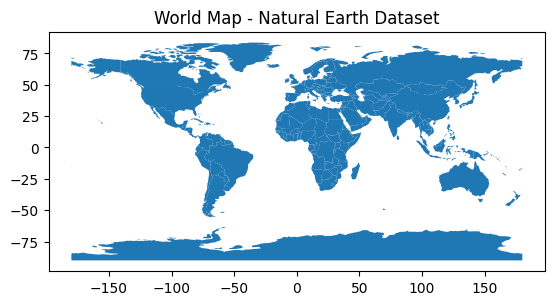

In [25]:
# Load the dataset
world = load_natural_earth_data()

# Plot the world map
world.plot()
plt.title("World Map - Natural Earth Dataset")
plt.show()


In [26]:
# Clean up downloaded files
def cleanup_downloaded_data():
    if os.path.exists("natural_earth_data"):
        print("Cleaning up downloaded files...")
        for root, dirs, files in os.walk("natural_earth_data", topdown=False):
            for name in files:
                os.remove(os.path.join(root, name))
            for name in dirs:
                os.rmdir(os.path.join(root, name))
        os.rmdir("natural_earth_data")

In [28]:
# Function to create a Folium map
def create_folium_map(location, zoom_start=10):
    return folium.Map(location=location, zoom_start=zoom_start)

# Create Folium maps for the USA and Boulder, Colorado
usa_map = create_folium_map([37.0902, -95.7129], zoom_start=4)
boulder_map = create_folium_map([40.015, -105.27], zoom_start=12)

In [29]:
# Save the Folium maps as HTML files
usa_map.save("Usa_map.html")
boulder_map.save("Boulder_map.html")

In [30]:
# Notify the user about saved maps
print(f"USA map saved as Usa_map.html in {os.getcwd()}")
print(f"Boulder map saved as Boulder_map.html in {os.getcwd()}")

USA map saved as Usa_map.html in /content
Boulder map saved as Boulder_map.html in /content


In [31]:
# Create an ipyleaflet map with a default center and zoom level
ipyleaflet_map = Map(center=(0, 0), zoom=2)

In [32]:
# Add a topographic layer to the ipyleaflet map
topo_layer = TileLayer(
    url='https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
    attribution='Map data: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> contributors'
)
ipyleaflet_map.add_layer(topo_layer)

In [33]:
# Add a scale control to the ipyleaflet map
scale = ScaleControl(position='bottomleft')
ipyleaflet_map.add_control(scale)

# Display the ipyleaflet map
ipyleaflet_map

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…